The variables:

Hours Studied: The number of hours of study for a particular student

Previous Scores: The previous performance score of a student

Extracurricular Activities: Whether the student takes part or not in extracurricular activities

Sleep Hours: The number of hours of sleep

Sample Question Papers Practiced: The number of sample question papers the student practiced

Performance Index: A measure of the overall performance of each student, ranging from 10 to 100

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.shape

(10000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.rename(columns={"Sample Question Papers Practiced": "Sample Questions"}, inplace=True)

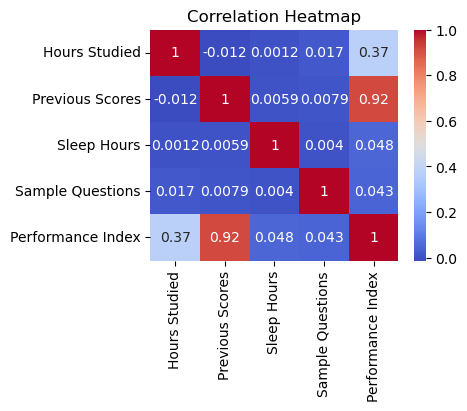

In [7]:
numerical_features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Questions"]


plt.figure(figsize=(4, 3))

# Calculate the correlation matrix for the numerical columns
correlation_matrix = df[numerical_features].corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()



In [8]:
df.replace(to_replace=["No","Yes"], value=[0,1], inplace=True)

In [9]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Questions,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [10]:
def train_test_split(df, ratio):
    num_of_rows = int(len(df) * ratio)
    df = df.sample(frac = 1)
    train_set = df[:num_of_rows]
    test_set = df[num_of_rows:]
    return train_set, test_set

train_set, test_set = train_test_split(df, 0.70)

In [11]:
X_train = train_set[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Questions"]]
y_train = train_set[["Performance Index"]]

X_test = test_set[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Questions"]]
y_test = test_set[["Performance Index"]]

In [12]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

X_train

array([[ 4, 93,  0,  8,  5],
       [ 2, 92,  0,  4,  1],
       [ 2, 95,  0,  5,  5],
       ...,
       [ 8, 97,  0,  6,  3],
       [ 9, 96,  0,  9,  3],
       [ 7, 60,  0,  7,  7]], dtype=int64)

In [13]:
def mae(y_preds, y):
    mae = (np.abs(y-y_preds)).mean()
    return mae

def mse(y_preds, y):
    mse = ((y - y_preds)**2).mean()
    return mse

def rmse(y_preds, y):
    rmse = (((y - y_preds)**2).mean())**(1/2)
    return rmse

def nrmse(y_preds, y):
    nrmse = rmse(y_preds, y) / ((y.max() - y.min()))
    return nrmse

def r2(y_preds, y):
    ssr = sum((y - y_preds) ** 2) 
    sst = sum((y - y.mean()) ** 2) 
    return 1 - ssr/sst

In [14]:
class Multiple_Linear_Regression:
    
    def __init__(self, learning_rate = 0.00015, n_iterations = 100000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
    
    @staticmethod
    def _mean_squared_error(y, y_hat):
        return (1/(len(y)))*np.sum(np.square(y_hat - y))
    
    def fit(self, X, y):
        self.weights = np.zeros((X.shape[1], 1))
        self.bias = 0
        
        for i in range(self.n_iterations):
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat-y))
            
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [15]:
model = Multiple_Linear_Regression()

In [16]:
model.fit(X_train, y_train)


KeyboardInterrupt



In [ ]:
preds = model.predict(X_test)

In [ ]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys)
plt.show()

In [ ]:
MAE = mae(preds, y_test)
MSE = mse(preds, y_test)
RMSE = rmse(preds, y_test)
NRMSE = nrmse(preds, y_test)
R2 = r2(preds, y_test)
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("NRMSE: ", NRMSE)
print("R2: ", R2)

# Cross Validation

In [ ]:
def kfold_indices(data_length, k):
    fold_size = data_length // k
    indices = np.arange(data_length)
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

In [ ]:
X = df[["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Questions"]]
y = df[["Performance Index"]]

In [ ]:
fold_indices = kfold_indices(10000, 5)

In [ ]:
scores = []
for train_indices, test_indices in fold_indices:
    X_train, y_train = X.loc[train_indices], y.loc[train_indices]
    X_test, y_test = X.loc[test_indices], y.loc[test_indices]
    
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    fold_score = rmse(y_test, y_pred)
    
    scores.append(fold_score)
    
mean_rmse = np.mean(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean RMSE:", mean_rmse)